# 1. Principal Component Analysis 
One of the most used techniques when performing dimensionality reduction is **principal component analysis**. 

In [205]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

In [206]:
num_points = 100
x_1 = np.linspace(0, 6, num_points)
noise = np.random.normal(0,1,num_points)
x_2 = 2*x_1 + noise

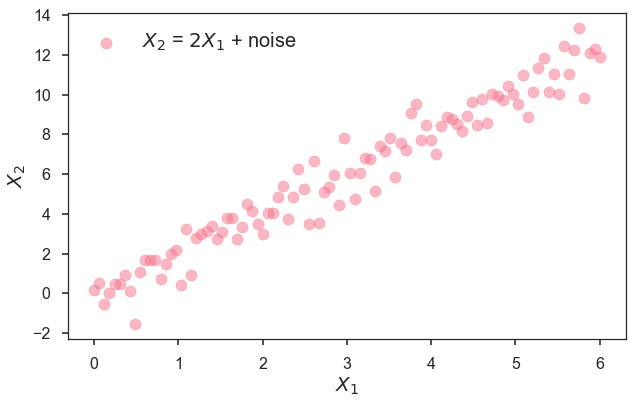

In [208]:
fig, ax = plt.subplots(figsize=(10,6))
    
plt.scatter(x_1, x_2, alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('$X_1$', fontsize=20)
ax.set_ylabel('$X_2$', fontsize=20)

plt.show()

We then want to center the data so that the origin is dead in the center of the data cloud. To do this, we simply subtract the mean from each dimension. 

In [187]:
mu_x_1 = x_1.mean()
mu_x_2 = x_2.mean()
print('Mean of x_1: ', mu_x_1, '\nMean of x_2: ', mu_x_2)

Mean of x_1:  3.0 
Mean of x_2:  5.916100463908249


In [188]:
centered_x_1 = x_1 - mu_x_1
centered_x_2 = x_2 - mu_x_2

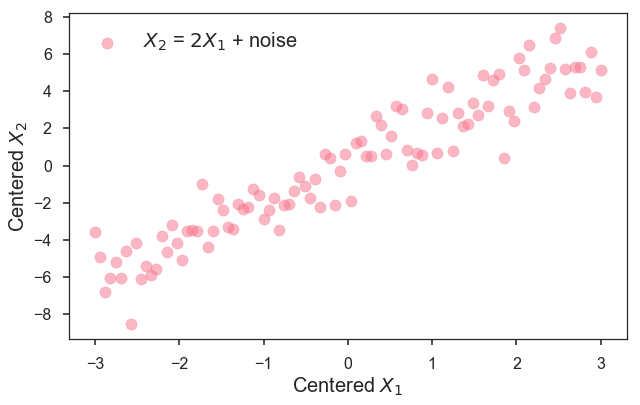

In [209]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(centered_x_1, centered_x_2, alpha=0.5)

"""Create legend & labels"""
ax.legend(['$X_2$ = $2X_1$ + noise'], fontsize=20)
ax.set_xlabel('Centered $X_1$', fontsize=20)
ax.set_ylabel('Centered $X_2$', fontsize=20)

plt.show()

We can now compute the covariance matrix $\Sigma$. The covariance between two attributes is essentially an indication as to whether they change together or in opposite directions. The covariance matrix is defined as:

$$cov(X_1,X_2) = E \big[(X_1 - E[X_1])(X_2 - E[X_2])\big]$$

Where $E$ is the expected value, and hence in this case the mean. This allows us to rewrite the above as:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i - E[X_1])(X_2^i - E[X_2])$$

And $E[X_1]$ is simply the expected value of $X_1$, in which case as a random variable that simplifies to the mean of X_1, $\mu_{X_1}$. The same goes for $X_2$:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i - \mu_{X_1})(X_2^i - \mu_{X_2})$$

Finally, remember that we already have centered the data by subtracting the mean in the prior step, so that is no longer necessary, reducing our equation to:

$$cov(X_1, X_2) = \frac{1}{N} \sum_i^N (X_1^i)(X_2^i)$$

Now, one final point: when calculating the covariance matrix we will need to determine how $X_1$ varies with $X_2$, but also how $X_2$ varies with $X_1$ (they will be the same), and then how $X_1$ and $X_2$ vary with themselves (the variance). We can write a simple function to do just that:

In [198]:
def calculate_covariance(a,b):
    """a and b are both numpy arrays."""
    return (a*b).sum() / len(a)

In [203]:
print('Covariance between X_1 and X_2: ', calculate_covariance(centered_x_1, centered_x_2))
print('Covariance between X_2 and X_1: ', calculate_covariance(centered_x_2, centered_x_1))
print('Variance between X_1 and X_1: ', calculate_covariance(centered_x_1, centered_x_1))
print('Variance between X_2 and X_2: ', calculate_covariance(centered_x_2, centered_x_2))

Covariance between X_1 and X_2:  6.171971580413505
Covariance between X_2 and X_1:  6.171971580413505
Variance between X_1 and X_1:  3.0606060606060606
Variance between X_2 and X_2:  13.914296249580053


We can quickly compare our results to the built in covariance matrix function, `np.cov`, supplied from numpy:

In [210]:
print(np.cov(centered_x_1, centered_x_2, bias=True))

[[ 3.06060606  6.17197158]
 [ 6.17197158 13.91429625]]


Looks like our function lines up perfectly. For a quick sanity check, do these values make sense? We have found a variance of 3.06 for $X_1$ and 13.9 for $X_2$. That seems reasonable, considering our points are clearly more spread out in $X_2$. And we then found a positive covariance of 6.17 when relating $X_1$ to $X_2$; this also makes sense considering our points do clearly seem to co-vary positively. 